In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df_train = pd.read_csv("datatraining.csv")

In [3]:
df_train.drop('date',axis=1, inplace = True)

In [4]:
df_test= pd.read_csv("datatest.csv")

In [5]:
df_test.drop('date',axis=1, inplace = True)

In [6]:
df_train

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180000,27.272000,426.0,721.250000,0.004793,1
1,23.150000,27.267500,429.5,714.000000,0.004783,1
2,23.150000,27.245000,426.0,713.500000,0.004779,1
3,23.150000,27.200000,426.0,708.250000,0.004772,1
4,23.100000,27.200000,426.0,704.500000,0.004757,1
5,23.100000,27.200000,419.0,701.000000,0.004757,1
6,23.100000,27.200000,419.0,701.666667,0.004757,1
7,23.100000,27.200000,419.0,699.000000,0.004757,1
8,23.100000,27.200000,419.0,689.333333,0.004757,1
9,23.075000,27.175000,419.0,688.000000,0.004745,1


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df_train.drop('Occupancy',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(df_train.drop('Occupancy',axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df_train.columns[:-1])
df_feat.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.518470,0.278526,1.573763,0.364948,1.091757
1,2.488967,0.277713,1.591735,0.341881,1.080555
2,2.488967,0.273645,1.573763,0.340290,1.075889
3,2.488967,0.265508,1.573763,0.323587,1.066555
4,2.439796,0.265508,1.573763,0.311655,1.049523


In [12]:
scaled_test= scaler.transform(df_test.drop('Occupancy',axis=1))

In [13]:
df_feat2 = pd.DataFrame(scaled_test,columns=df_test.columns[:-1])
df_feat2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,1.122006,0.976668,1.631959,1.346224,1.359302
1,1.151509,0.952561,1.631959,1.251835,1.344717
2,1.129382,0.974709,1.614842,1.263766,1.359956
3,1.129382,0.974709,1.640517,1.282061,1.359956
4,1.151509,0.976668,1.631959,1.269865,1.370198


In [16]:
X_train= df_feat[:]

In [17]:
y_train= df_train['Occupancy']

In [18]:
X_test= df_feat2[:]

In [19]:
y_test= df_test['Occupancy']

In [20]:
X_train

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.518470,0.278526,1.573763,0.364948,1.091757
1,2.488967,0.277713,1.591735,0.341881,1.080555
2,2.488967,0.273645,1.573763,0.340290,1.075889
3,2.488967,0.265508,1.573763,0.323587,1.066555
4,2.439796,0.265508,1.573763,0.311655,1.049523
5,2.439796,0.265508,1.537818,0.300520,1.049523
6,2.439796,0.265508,1.537818,0.302641,1.049523
7,2.439796,0.265508,1.537818,0.294156,1.049523
8,2.439796,0.265508,1.537818,0.263400,1.049523
9,2.415210,0.260988,1.537818,0.259158,1.035863


In [24]:
df_feat

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.518470,0.278526,1.573763,0.364948,1.091757
1,2.488967,0.277713,1.591735,0.341881,1.080555
2,2.488967,0.273645,1.573763,0.340290,1.075889
3,2.488967,0.265508,1.573763,0.323587,1.066555
4,2.439796,0.265508,1.573763,0.311655,1.049523
5,2.439796,0.265508,1.537818,0.300520,1.049523
6,2.439796,0.265508,1.537818,0.302641,1.049523
7,2.439796,0.265508,1.537818,0.294156,1.049523
8,2.439796,0.265508,1.537818,0.263400,1.049523
9,2.415210,0.260988,1.537818,0.259158,1.035863


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(scaled_features,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
pred = knn.predict(scaled_test)

In [26]:
print(confusion_matrix(y_test,pred))

[[7358  345]
 [ 309 1740]]


In [27]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      7703
          1       0.83      0.85      0.84      2049

avg / total       0.93      0.93      0.93      9752



In [28]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

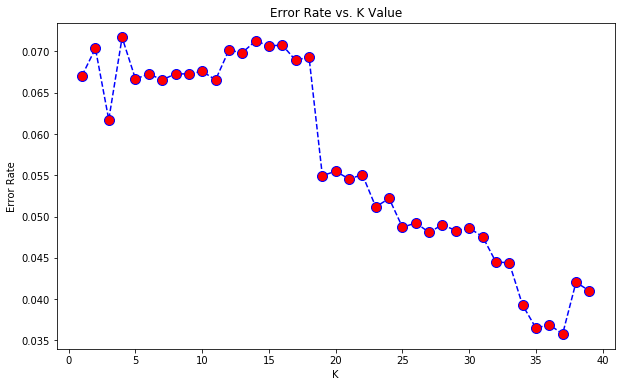

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
knn = KNeighborsClassifier(n_neighbors=37)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=37')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=37


[[7442  261]
 [  88 1961]]


             precision    recall  f1-score   support

          0       0.99      0.97      0.98      7703
          1       0.88      0.96      0.92      2049

avg / total       0.97      0.96      0.96      9752



----------------------------------------------------------------------------------------------------------------------

Support Vector Machines

In [13]:
sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train)
X_test_svm = sc.transform(X_test)

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

In [16]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [17]:
grid_search = grid_search.fit(X_train_svm, y_train)

In [19]:
grid_search.best_score_

0.98305292889598428

In [20]:
grid_search.best_params_

{'C': 100, 'kernel': 'linear'}

In [21]:
classifier.fit(X_train_svm, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = classifier.predict(X_test_svm)

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[7290  413]
 [  44 2005]]


In [25]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      7703
          1       0.83      0.98      0.90      2049

avg / total       0.96      0.95      0.95      9752



Logistic Regression with Parameter tuning of 'C'

In [26]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [27]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [28]:
logreg = LogisticRegression()

In [29]:
logreg_cv = GridSearchCV(logreg, param_grid, cv= 10)

In [30]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   8.48343e-05,   7.19686e-04,   6.10540e-03,
         5.17947e-02,   4.39397e-01,   3.72759e+00,   3.16228e+01,
         2.68270e+02,   2.27585e+03,   1.93070e+04,   1.63789e+05,
         1.38950e+06,   1.17877e+07,   1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.051794746792312128}
Best score is 0.9882107331450325


In [34]:
pred = logreg_cv.predict(X_test)

In [35]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752



Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB(priors=None)

In [37]:
y_pred = nbc.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.95      0.99      0.97      2049

avg / total       0.99      0.99      0.99      9752



Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred = classifier.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97      7703
          1       0.85      0.97      0.91      2049

avg / total       0.96      0.96      0.96      9752

